In [1]:
#Refer: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

In [2]:
!ls

Untitled.ipynb   dogs-vs-cats     dogs-vs-cats.zip


In [3]:
#we have dogs-vs-cats dataset containing train and test data.

In [4]:
!ls dogs-vs-cats/

sampleSubmission.csv test1.zip            train.zip
test1                train


In [5]:
# !ls dogs-vs-cats/train/
#cat.3369.jpg  cat.787.jpg
# cat.9653.jpg  dog.2902.jpg  dog.7402.jpg

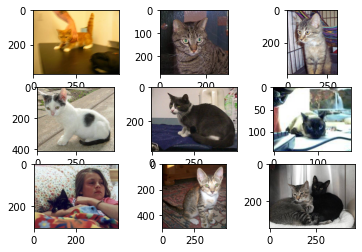

In [6]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'dogs-vs-cats/train/'
# plot first few images
for i in range(9):
	# define subplot (3,3,0+1+i)
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

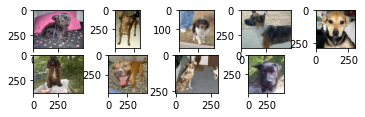

In [7]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'dogs-vs-cats/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(550 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [8]:
#The photos will have to be reshaped prior to modeling so that all images
#have the same shape. This is often a small square image.
#let's make it 200*200*3 size where 3  for gray scale 

In [9]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'dogs-vs-cats/train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('cat'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

(25000, 200, 200, 3) (25000,)


In [22]:
print("Size ", len(photos), len(labels))


Size  25000 25000


In [25]:
print(photo[0], labels[0])

[[ 82.  81.  79.]
 [ 87.  86.  84.]
 [ 83.  82.  80.]
 [ 87.  86.  84.]
 [ 78.  77.  75.]
 [ 77.  76.  74.]
 [ 72.  71.  67.]
 [ 72.  71.  67.]
 [ 71.  70.  66.]
 [ 71.  70.  66.]
 [ 71.  70.  66.]
 [ 68.  67.  63.]
 [ 65.  64.  60.]
 [ 69.  63.  63.]
 [ 63.  58.  55.]
 [ 60.  55.  52.]
 [ 59.  54.  48.]
 [ 60.  55.  49.]
 [ 63.  59.  50.]
 [ 59.  55.  44.]
 [ 58.  54.  43.]
 [ 56.  52.  41.]
 [ 58.  54.  43.]
 [ 53.  49.  38.]
 [ 61.  57.  46.]
 [ 71.  67.  56.]
 [ 57.  54.  39.]
 [ 45.  42.  27.]
 [ 50.  46.  35.]
 [ 39.  35.  26.]
 [ 46.  41.  37.]
 [ 44.  39.  36.]
 [ 41.  37.  28.]
 [ 35.  36.  20.]
 [ 32.  45.  17.]
 [ 30.  46.  19.]
 [ 31.  45.  32.]
 [ 32.  44.  42.]
 [ 40.  51.  35.]
 [ 40.  44.  27.]
 [ 63.  51.  27.]
 [ 78.  55.  23.]
 [121.  87.  41.]
 [127.  88.  33.]
 [102.  62.   0.]
 [109.  56.   2.]
 [111.  62.   3.]
 [121.  77.  16.]
 [126.  91.  37.]
 [126.  93.  48.]
 [122.  92.  56.]
 [124.  93.  62.]
 [132. 101.  70.]
 [134. 104.  76.]
 [145. 118.  91.]
 [144. 118

In [26]:
#these data can be loaded directly
# load and confirm the shape
from numpy import load
#photos = load('dogs_vs_cats_photos.npy')
#labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

(25000, 200, 200, 3) (25000,)


In [27]:
###Another method is also easy 
#Alternately, we can load the images progressively using the Keras ImageDataGenerator 
#class and flow_from_directory() API.
#This will be slower to execute but will run on more machines.

In [28]:
#We'll create directory str like below 
# dataset_name
#    -train
#        -cat
#        -dog
#    -test
#        -cat
#        -dog

In [37]:
# create directories
import os
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

In [38]:
#now put imnages into those directories
# we can randomly decide to hold back 25% of the
#images into the test dataset. This is done consistently by fixing the seed for
#the pseudorandom number generator so that we get the same split of data each time the code is run.

In [49]:
# seed random number generator
import random as r
import shutil
r.seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'dogs-vs-cats/train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if r.random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		shutil.copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		shutil.copyfile(src, dst)

In [50]:
#Define a baseline model

In [52]:
#Each layer will use the ReLU activation function and the He
#weight initialization, which are generally best practices. For example, a 3-block VGG-style
#architecture where each block has a single convolutional and pooling layer can be defined in Keras as follows:

In [53]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [55]:
# import required packages
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
# define model
model = define_model()

In [56]:
#This involves first defining an instance of the 
#ImageDataGenerator that will scale the pixel values to the range of 0-1
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [62]:
#iterators need to be prepared for both the train and test datasets.
#We can use the flow_from_directory() function on the data generator
#and create one iterator for each of the train/ and test/ directories.
#We must specify that the problem is a binary classification problem via 
#the “class_mode” argument, and to load the images with the size of 200×200 
#pixels via the “target_size” argument. We will fix the batch size at 64
#

In [63]:
# prepare iterators
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [67]:
#The model will be fit for 20 epochs, a small number to check if the model can learn the problem.
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
	validation_data=test_it, validation_steps=len(test_it), epochs=1, verbose=0)

In [68]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

> 72.727


In [75]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.show()
    #pyplot.close()

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/3
293/293 [==============================] - 301s 1s/step - loss: 0.7110 - accuracy: 0.5529 - val_loss: 0.6749 - val_accuracy: 0.5781
Epoch 2/3
293/293 [==============================] - 353s 1s/step - loss: 0.6636 - accuracy: 0.5988 - val_loss: 0.6568 - val_accuracy: 0.6096
Epoch 3/3
99/99 [==============================] - 38s 384ms/step - loss: 0.6463 - accuracy: 0.6178
> 61.780


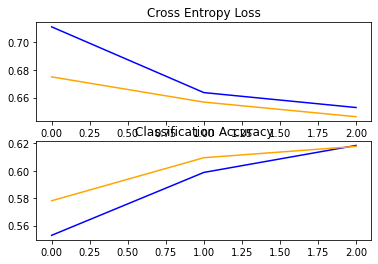

In [76]:
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=3, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()